So far, this notebook is able to create line graphs of individual columns vs. the given x-axis.

It seems as if the majority of the data is of technetium-99, though some columns can be attributed to cobalt-60. No column resembling cesium-137 has been found.

There are differences among all the technetium-99, though. The vertical axis has larger or smaller units between graphs and there's a bump around 1.2 MeV fluctuates.

In [1]:
# Setting up the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Initialization successful.")

Initialization successful.


In [2]:
# Setting up the dataframe and printing 
# number of rows, columns, etc.

path = "SpectraMatrixWithXAxis.csv"
PNNLdata = pd.read_csv(path, header=None, index_col=0)
PNNLdata.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 200 entries, 0.05975 to 2.0
Columns: 1765 entries, 1 to 1765
dtypes: float64(1765)
memory usage: 2.7 MB


In [3]:
# This looks at the first 5 rows of the
# imported data, which look correct.

PNNLdata.head()

,1,2,3,4,5,6,7,8,9,10,...,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765
0,,,,,,,,,,,,,,,,,,,,,
0.05975,2.560000e-08,1.520000e-08,2.170000e-08,2.480000e-08,2.930000e-08,1.750000e-08,2.510000e-08,2.840000e-08,3.220000e-08,1.930000e-08,...,2.740000e-08,2.750000e-08,1.610000e-08,2.340000e-08,2.650000e-08,2.430000e-08,1.420000e-08,2.050000e-08,2.340000e-08,0.0
0.06950,3.930000e-08,2.350000e-08,3.330000e-08,3.800000e-08,4.510000e-08,2.690000e-08,3.830000e-08,4.340000e-08,4.870000e-08,2.880000e-08,...,4.250000e-08,4.170000e-08,2.430000e-08,3.520000e-08,4.020000e-08,3.620000e-08,2.080000e-08,3.030000e-08,3.470000e-08,10.0
0.07925,1.810000e-07,1.050000e-07,1.540000e-07,1.750000e-07,2.050000e-07,1.190000e-07,1.740000e-07,1.980000e-07,2.200000e-07,1.280000e-07,...,1.910000e-07,1.880000e-07,1.090000e-07,1.600000e-07,1.820000e-07,1.660000e-07,9.670000e-08,1.410000e-07,1.600000e-07,100.0
0.08900,7.080000e-08,4.180000e-08,5.990000e-08,6.850000e-08,8.150000e-08,4.780000e-08,6.910000e-08,7.870000e-08,8.600000e-08,5.050000e-08,...,7.550000e-08,7.290000e-08,4.260000e-08,6.180000e-08,7.040000e-08,6.520000e-08,3.830000e-08,5.530000e-08,6.320000e-08,1000.0
0.09875,7.600000e-08,4.470000e-08,6.490000e-08,7.340000e-08,8.660000e-08,5.030000e-08,7.300000e-08,8.350000e-08,9.150000e-08,5.380000e-08,...,8.030000e-08,7.940000e-08,4.640000e-08,6.730000e-08,7.670000e-08,6.920000e-08,4.050000e-08,5.860000e-08,6.670000e-08,10000.0


In [4]:
# This shows the last 5 rows.

PNNLdata.tail()

,1,2,3,4,5,6,7,8,9,10,...,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765
0,,,,,,,,,,,,,,,,,,,,,
1.9610,1.960000e-10,1.260000e-10,1.680000e-10,1.910000e-10,2.790000e-10,1.580000e-10,2.560000e-10,2.790000e-10,3.910000e-10,2.100000e-10,...,2.650000e-10,2.750000e-10,1.580000e-10,2.370000e-10,2.610000e-10,2.330000e-10,1.210000e-10,1.770000e-10,2.100000e-10,407000.0
1.9707,3.030000e-10,1.960000e-10,2.650000e-10,2.930000e-10,2.650000e-10,1.440000e-10,2.240000e-10,2.610000e-10,3.540000e-10,1.910000e-10,...,3.070000e-10,2.890000e-10,1.630000e-10,2.240000e-10,2.750000e-10,2.280000e-10,1.440000e-10,1.910000e-10,2.190000e-10,409000.0
1.9805,2.280000e-10,1.350000e-10,2.050000e-10,2.240000e-10,2.610000e-10,1.490000e-10,2.330000e-10,2.560000e-10,2.240000e-10,1.260000e-10,...,1.820000e-10,2.610000e-10,1.630000e-10,2.280000e-10,2.510000e-10,2.420000e-10,1.820000e-10,2.140000e-10,2.330000e-10,412000.0
1.9902,1.860000e-10,9.310000e-11,1.580000e-10,1.860000e-10,2.050000e-10,1.070000e-10,1.860000e-10,2.050000e-10,2.280000e-10,1.400000e-10,...,2.750000e-10,2.420000e-10,1.440000e-10,2.280000e-10,2.370000e-10,2.510000e-10,1.490000e-10,2.100000e-10,2.510000e-10,414000.0
2.0000,1.960000e-10,1.070000e-10,1.540000e-10,1.860000e-10,3.070000e-10,1.630000e-10,2.510000e-10,2.790000e-10,2.930000e-10,1.540000e-10,...,2.100000e-10,2.840000e-10,1.580000e-10,2.510000e-10,2.750000e-10,1.490000e-10,1.070000e-10,1.210000e-10,1.400000e-10,416000.0


Now we plot the data. The relevant part of the following lines is the "y=1," which declares that the y-axis will be column 1. You can change this number to anything between 1 and 1764 to inspect the shape of the simulation at that column number.

These next three graphs are of columns 1, 1050, and 1765, which represent technetium-99, cobalt-60, and garbage data I placed at the end of the .csv file to prove to myself the code was actually graphing the column I told it to.

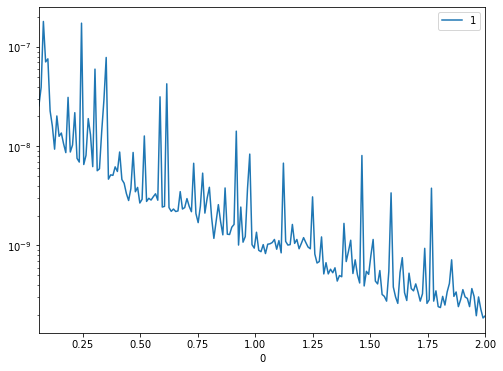

In [5]:
PNNLdata.plot(kind="line", y=1, figsize=(8, 6), logy=True)

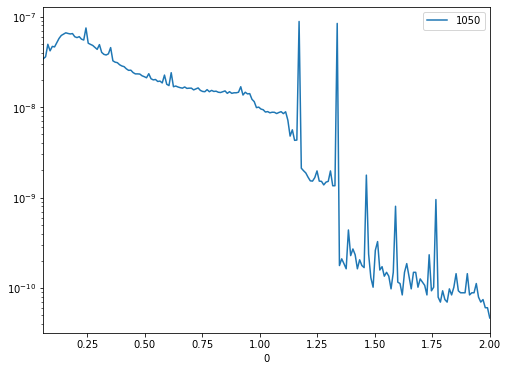

In [6]:
PNNLdata.plot(kind="line", y=1050, figsize=(8, 6), logy=True)

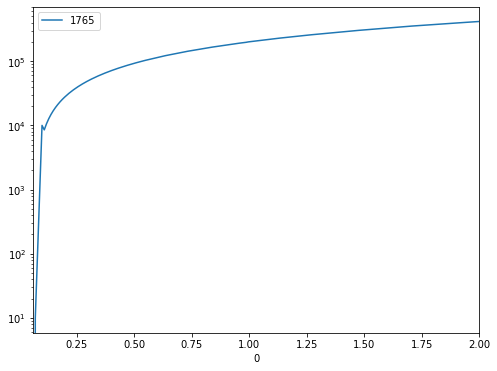

In [7]:
PNNLdata.plot(kind="line", y=1765, figsize=(8, 6), logy=True)

What follows is over 80 graphs, starting with column 11 and increasing by 21. Hopefully it didn't crash your browser!

If each column corresponds to a location in a 21x21 grid and there are four grids next to each other in the data, drawing graphs starting at 11 and increasing by 21 should be the equivalent of slicing down the center of each one.

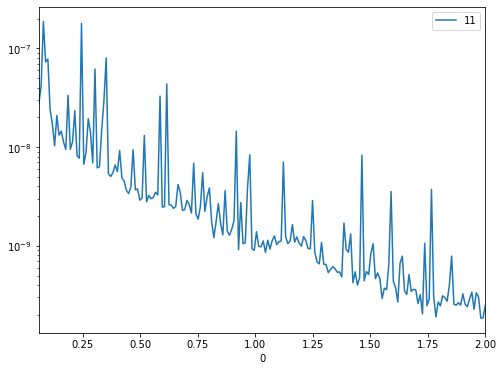

In [8]:
PNNLdata.plot(kind='line', y=11, figsize=(8, 6), logy=True)

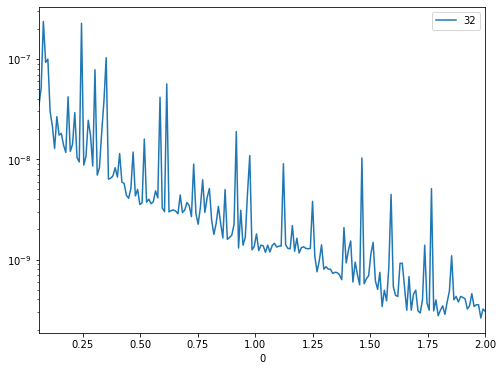

In [9]:
PNNLdata.plot(kind='line', y=32, figsize=(8, 6), logy=True)

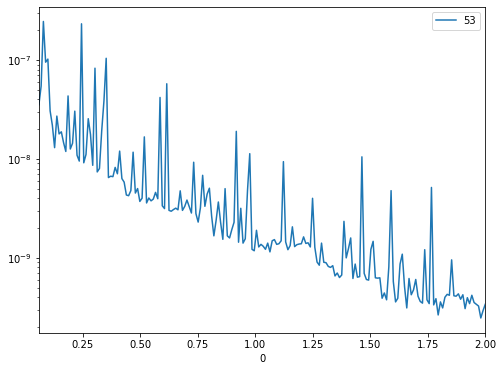

In [10]:
PNNLdata.plot(kind='line', y=53, figsize=(8, 6), logy=True)

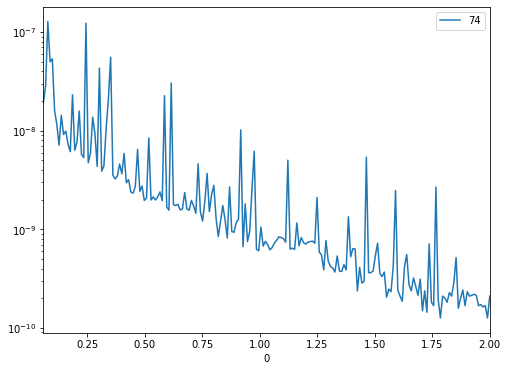

In [11]:
PNNLdata.plot(kind='line', y=74, figsize=(8, 6), logy=True)

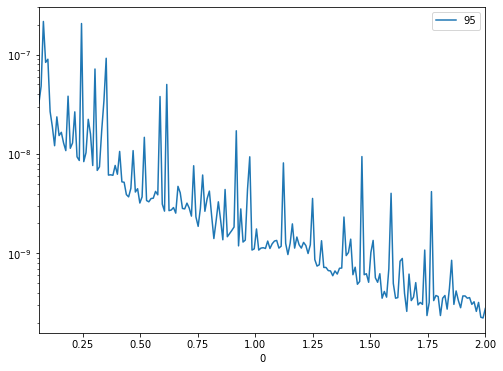

In [12]:
PNNLdata.plot(kind='line', y=95, figsize=(8, 6), logy=True)

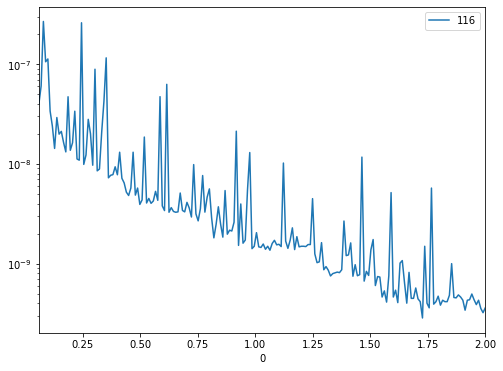

In [13]:
PNNLdata.plot(kind='line', y=116, figsize=(8, 6), logy=True)

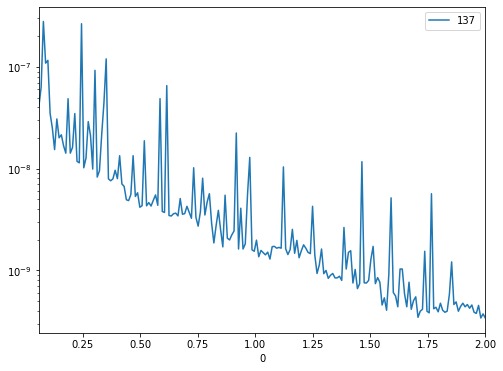

In [14]:
PNNLdata.plot(kind='line', y=137, figsize=(8, 6), logy=True)

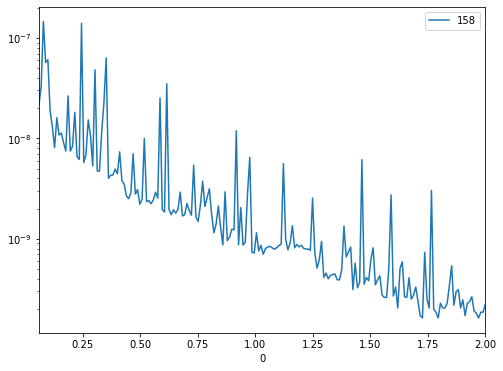

In [15]:
PNNLdata.plot(kind='line', y=158, figsize=(8, 6), logy=True)

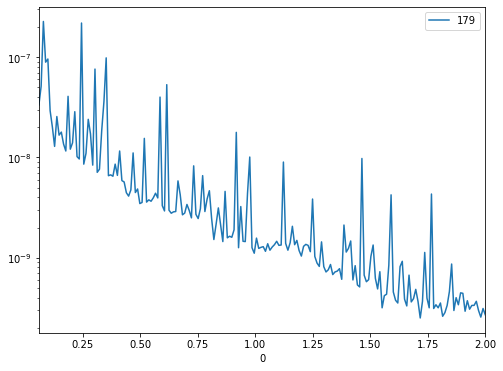

In [16]:
PNNLdata.plot(kind='line', y=179, figsize=(8, 6), logy=True)

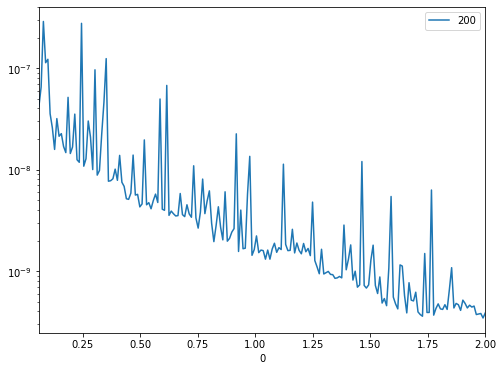

In [17]:
PNNLdata.plot(kind='line', y=200, figsize=(8, 6), logy=True)

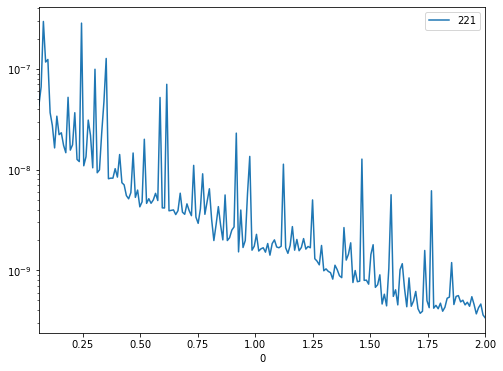

In [18]:
PNNLdata.plot(kind='line', y=221, figsize=(8, 6), logy=True)

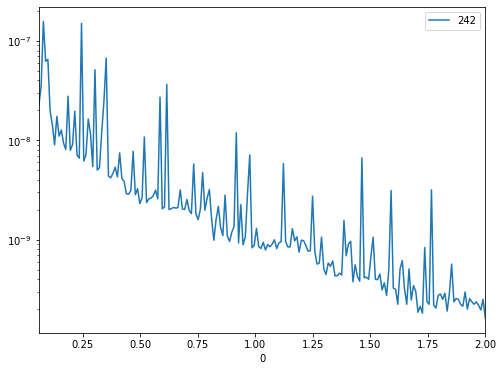

In [19]:
PNNLdata.plot(kind='line', y=242, figsize=(8, 6), logy=True)

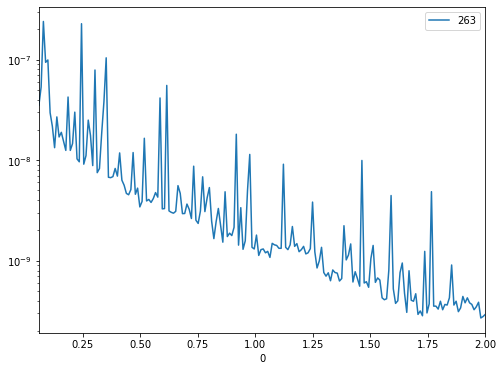

In [20]:
PNNLdata.plot(kind='line', y=263, figsize=(8, 6), logy=True)

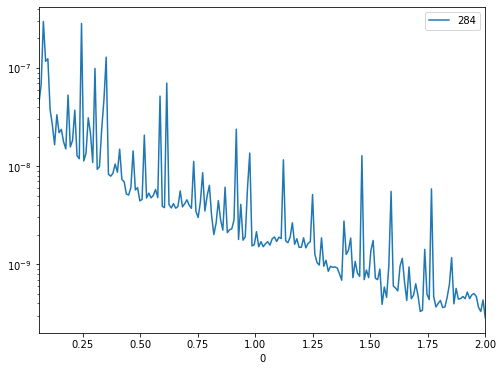

In [21]:
PNNLdata.plot(kind='line', y=284, figsize=(8, 6), logy=True)

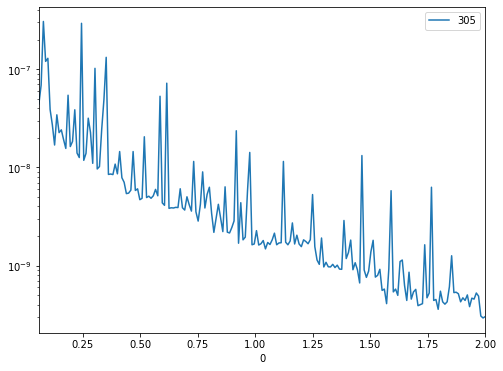

In [22]:
PNNLdata.plot(kind='line', y=305, figsize=(8, 6), logy=True)

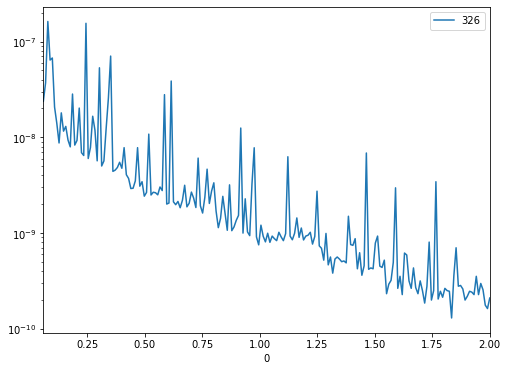

In [23]:
PNNLdata.plot(kind='line', y=326, figsize=(8, 6), logy=True)

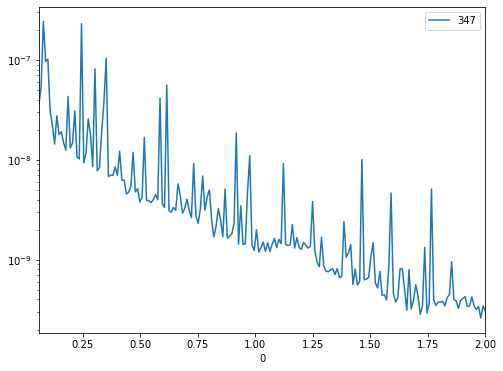

In [24]:
PNNLdata.plot(kind='line', y=347, figsize=(8, 6), logy=True)

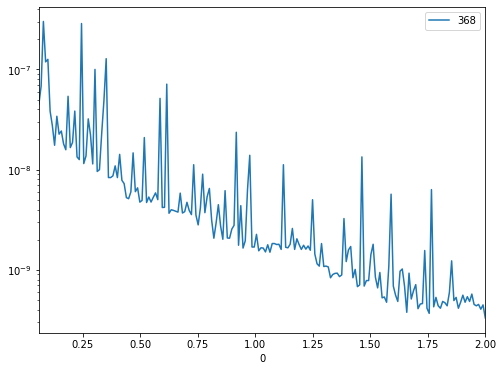

In [25]:
PNNLdata.plot(kind='line', y=368, figsize=(8, 6), logy=True)

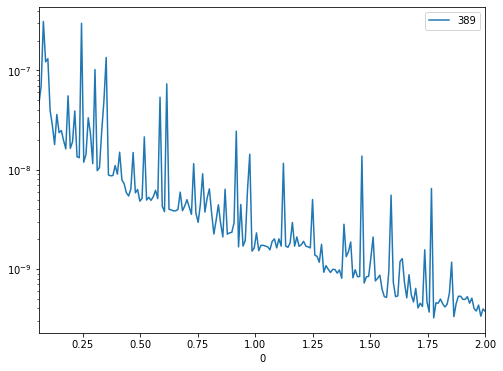

In [26]:
PNNLdata.plot(kind='line', y=389, figsize=(8, 6), logy=True)

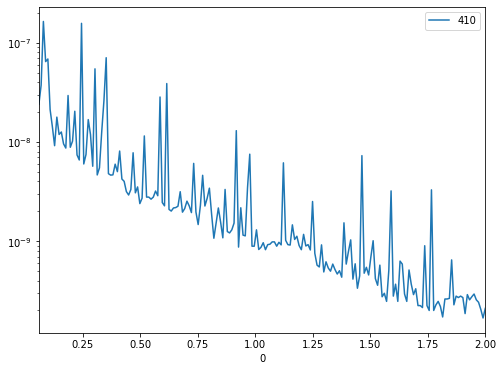

In [27]:
PNNLdata.plot(kind='line', y=410, figsize=(8, 6), logy=True)

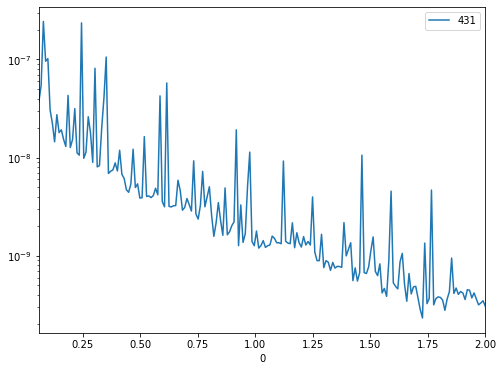

In [28]:
PNNLdata.plot(kind='line', y=431, figsize=(8, 6), logy=True)

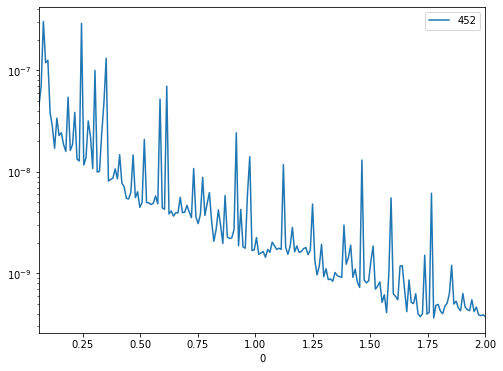

In [29]:
PNNLdata.plot(kind='line', y=452, figsize=(8, 6), logy=True)

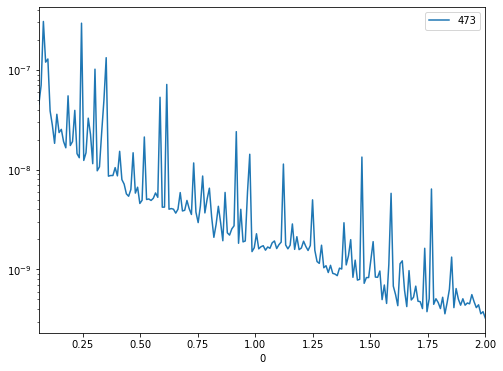

In [30]:
PNNLdata.plot(kind='line', y=473, figsize=(8, 6), logy=True)

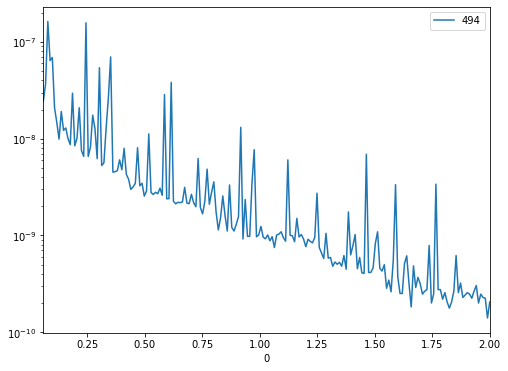

In [31]:
PNNLdata.plot(kind='line', y=494, figsize=(8, 6), logy=True)

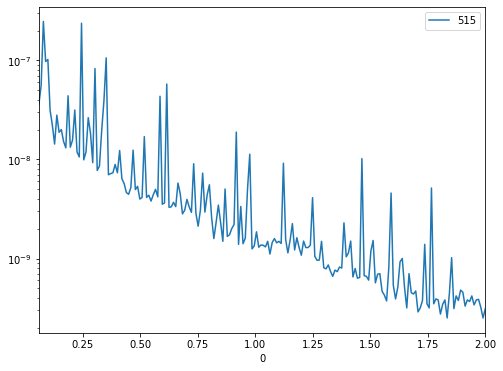

In [32]:
PNNLdata.plot(kind='line', y=515, figsize=(8, 6), logy=True)

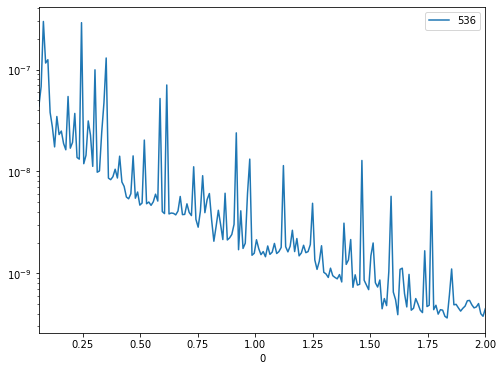

In [33]:
PNNLdata.plot(kind='line', y=536, figsize=(8, 6), logy=True)

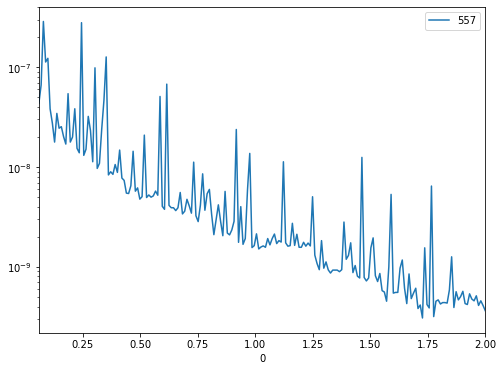

In [34]:
PNNLdata.plot(kind='line', y=557, figsize=(8, 6), logy=True)

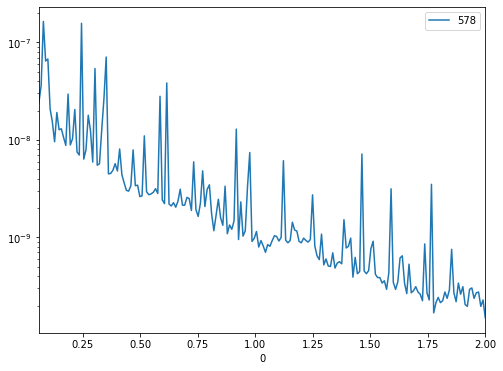

In [35]:
PNNLdata.plot(kind='line', y=578, figsize=(8, 6), logy=True)

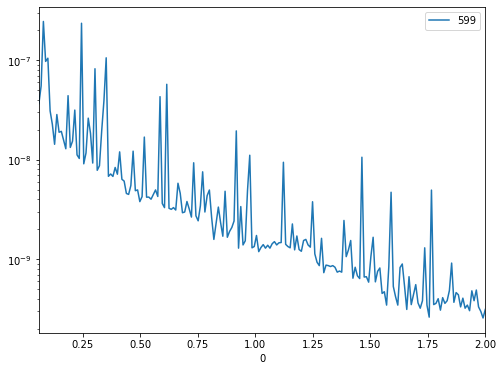

In [36]:
PNNLdata.plot(kind='line', y=599, figsize=(8, 6), logy=True)

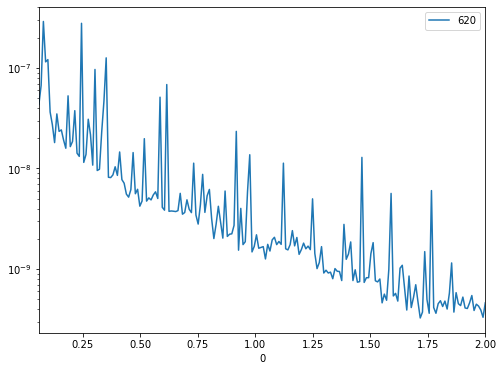

In [37]:
PNNLdata.plot(kind='line', y=620, figsize=(8, 6), logy=True)

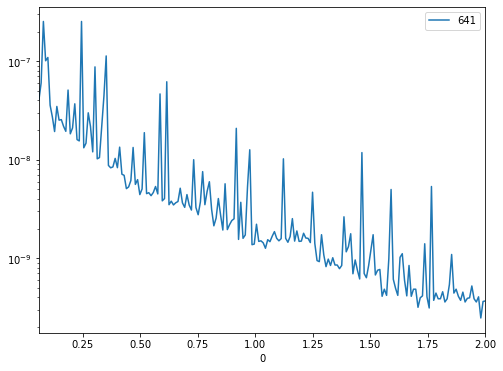

In [38]:
PNNLdata.plot(kind='line', y=641, figsize=(8, 6), logy=True)

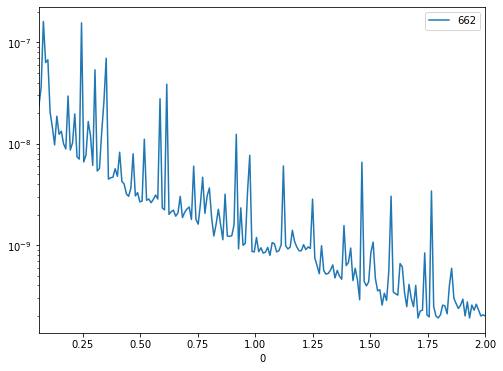

In [39]:
PNNLdata.plot(kind='line', y=662, figsize=(8, 6), logy=True)

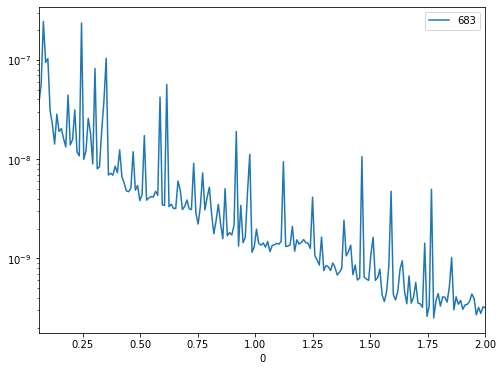

In [40]:
PNNLdata.plot(kind='line', y=683, figsize=(8, 6), logy=True)

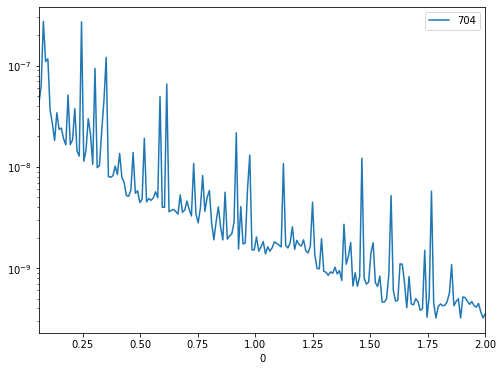

In [41]:
PNNLdata.plot(kind='line', y=704, figsize=(8, 6), logy=True)

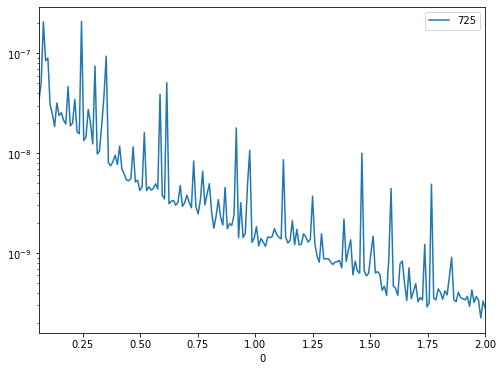

In [42]:
PNNLdata.plot(kind='line', y=725, figsize=(8, 6), logy=True)

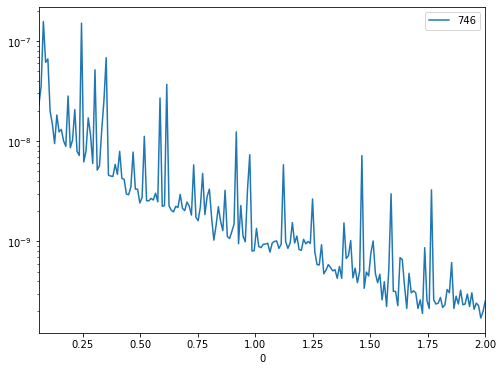

In [43]:
PNNLdata.plot(kind='line', y=746, figsize=(8, 6), logy=True)

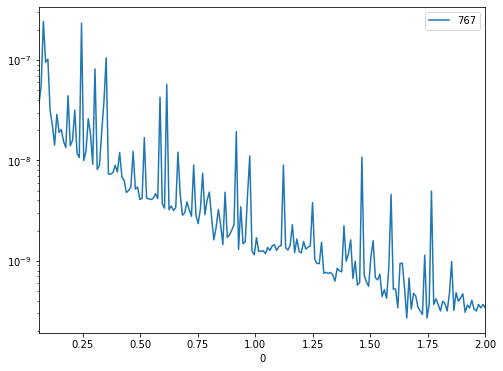

In [44]:
PNNLdata.plot(kind='line', y=767, figsize=(8, 6), logy=True)

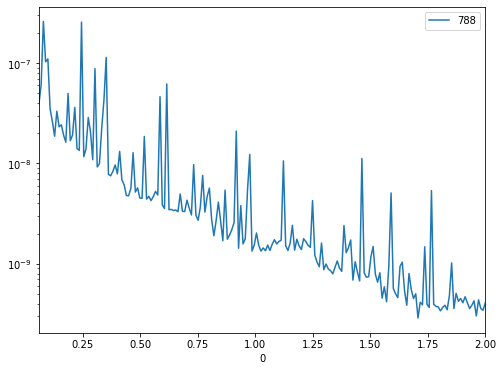

In [45]:
PNNLdata.plot(kind='line', y=788, figsize=(8, 6), logy=True)

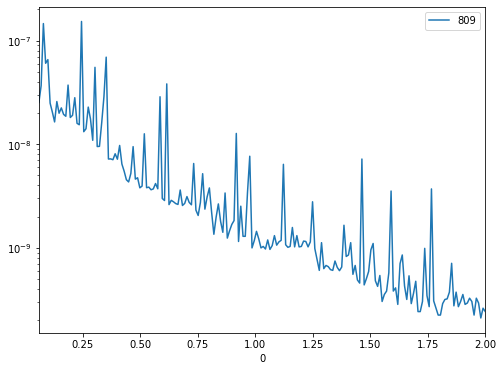

In [46]:
PNNLdata.plot(kind='line', y=809, figsize=(8, 6), logy=True)

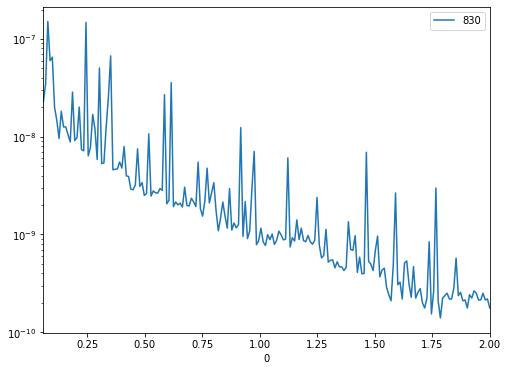

In [47]:
PNNLdata.plot(kind='line', y=830, figsize=(8, 6), logy=True)

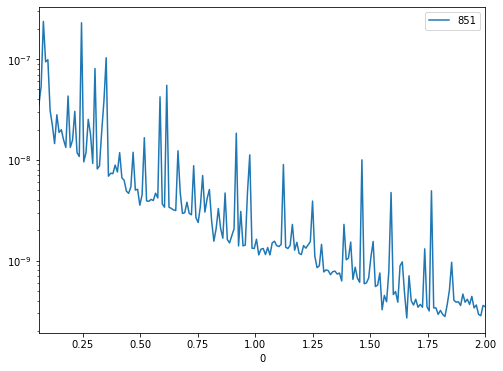

In [48]:
PNNLdata.plot(kind='line', y=851, figsize=(8, 6), logy=True)

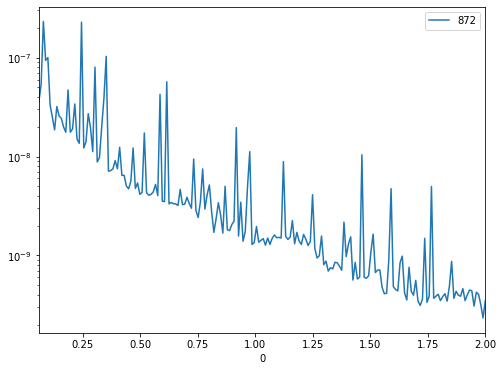

In [49]:
PNNLdata.plot(kind='line', y=872, figsize=(8, 6), logy=True)

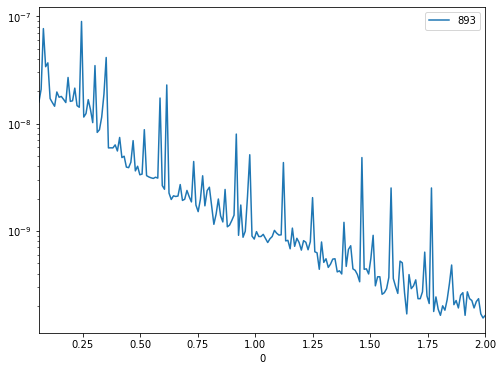

In [50]:
PNNLdata.plot(kind='line', y=893, figsize=(8, 6), logy=True)

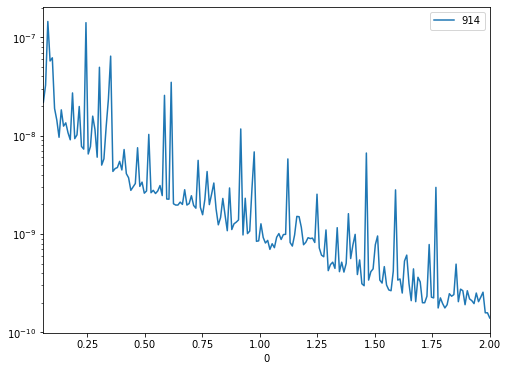

In [51]:
PNNLdata.plot(kind='line', y=914, figsize=(8, 6), logy=True)

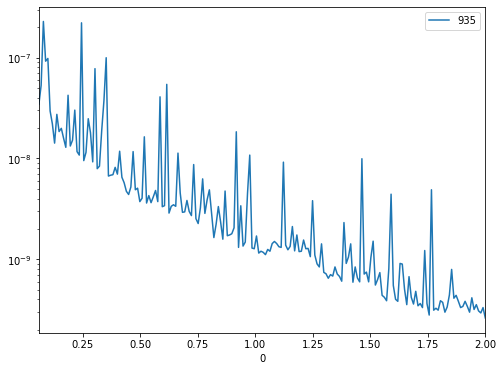

In [52]:
PNNLdata.plot(kind='line', y=935, figsize=(8, 6), logy=True)

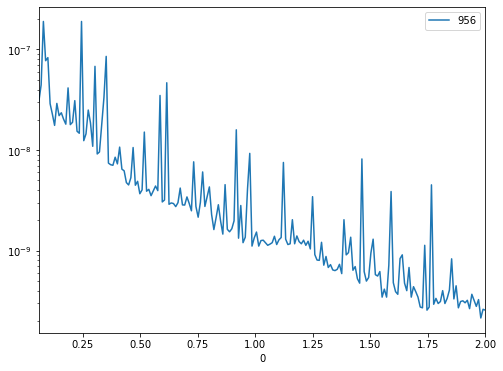

In [53]:
PNNLdata.plot(kind='line', y=956, figsize=(8, 6), logy=True)

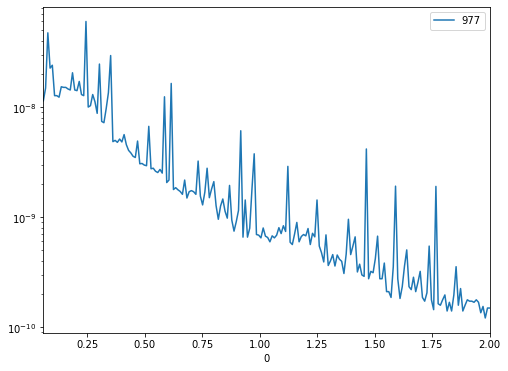

In [54]:
PNNLdata.plot(kind='line', y=977, figsize=(8, 6), logy=True)

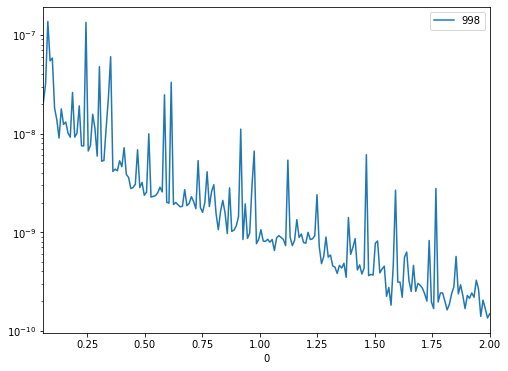

In [55]:
PNNLdata.plot(kind='line', y=998, figsize=(8, 6), logy=True)

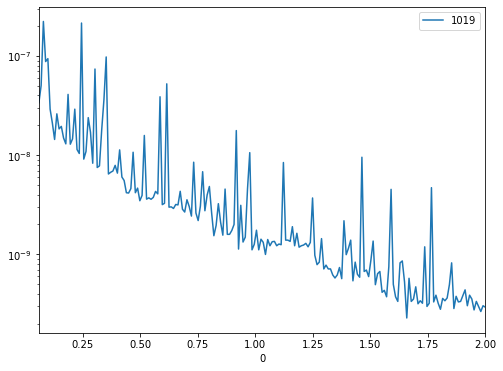

In [56]:
PNNLdata.plot(kind='line', y=1019, figsize=(8, 6), logy=True)

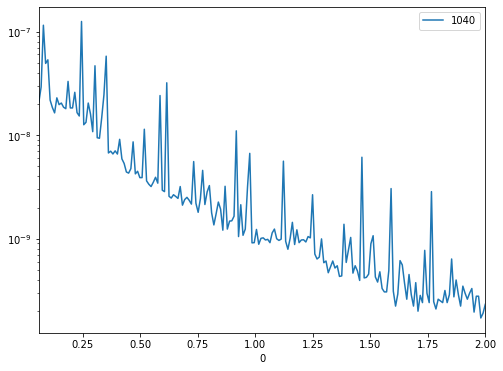

In [57]:
PNNLdata.plot(kind='line', y=1040, figsize=(8, 6), logy=True)

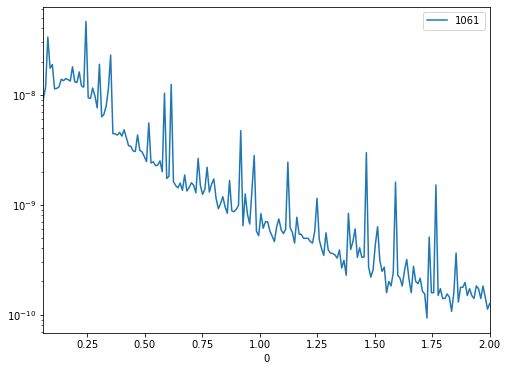

In [58]:
PNNLdata.plot(kind='line', y=1061, figsize=(8, 6), logy=True)

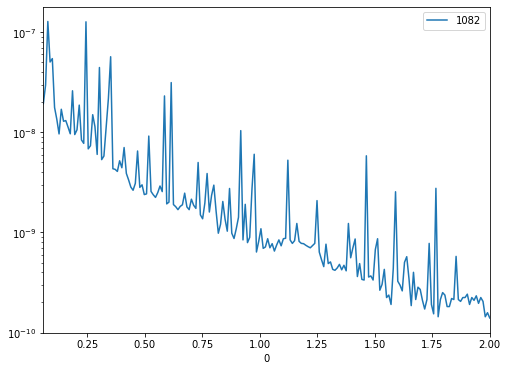

In [59]:
PNNLdata.plot(kind='line', y=1082, figsize=(8, 6), logy=True)

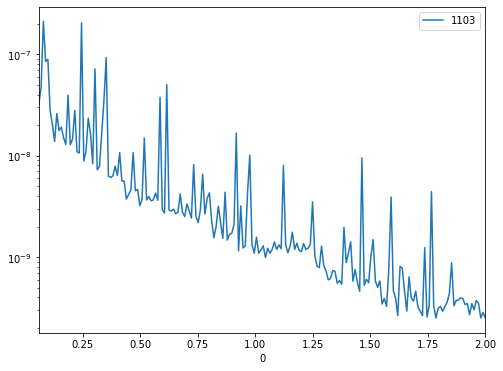

In [60]:
PNNLdata.plot(kind='line', y=1103, figsize=(8, 6), logy=True)

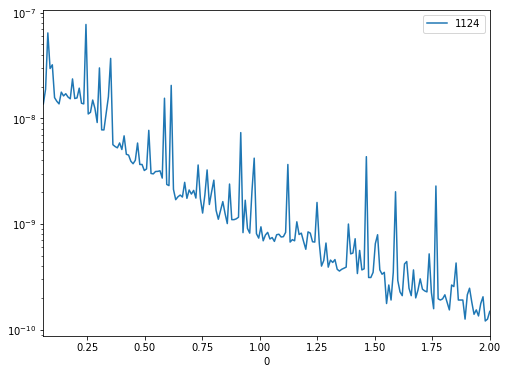

In [61]:
PNNLdata.plot(kind='line', y=1124, figsize=(8, 6), logy=True)

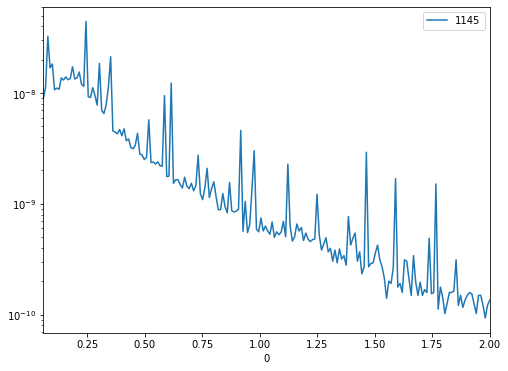

In [62]:
PNNLdata.plot(kind='line', y=1145, figsize=(8, 6), logy=True)

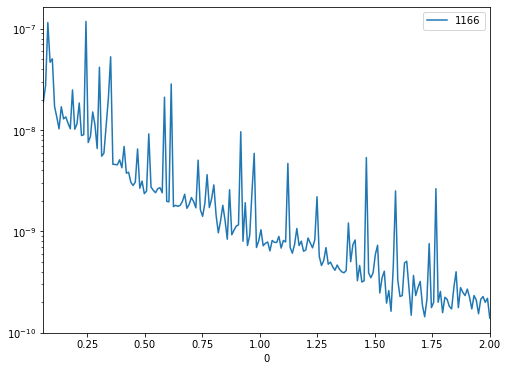

In [63]:
PNNLdata.plot(kind='line', y=1166, figsize=(8, 6), logy=True)

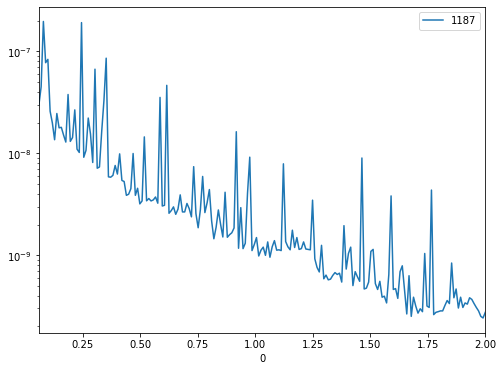

In [64]:
PNNLdata.plot(kind='line', y=1187, figsize=(8, 6), logy=True)

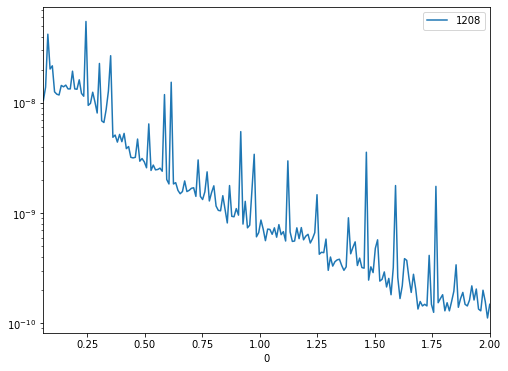

In [65]:
PNNLdata.plot(kind='line', y=1208, figsize=(8, 6), logy=True)

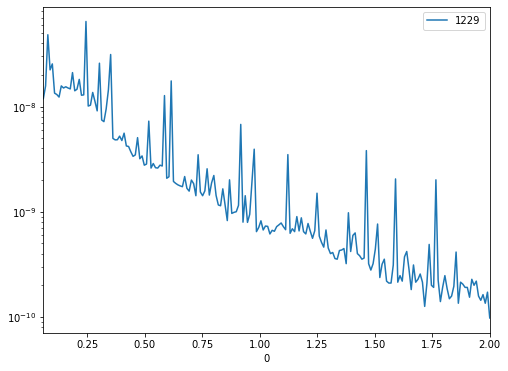

In [66]:
PNNLdata.plot(kind='line', y=1229, figsize=(8, 6), logy=True)

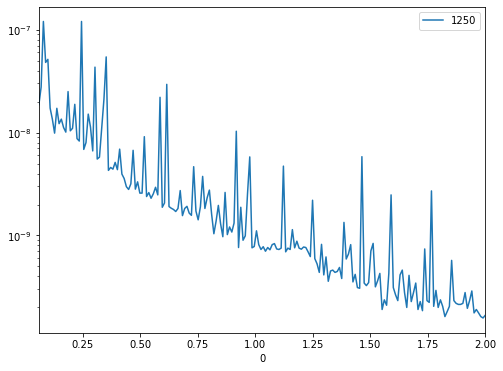

In [67]:
PNNLdata.plot(kind='line', y=1250, figsize=(8, 6), logy=True)

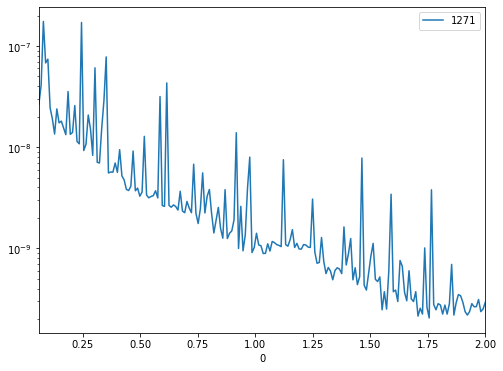

In [68]:
PNNLdata.plot(kind='line', y=1271, figsize=(8, 6), logy=True)

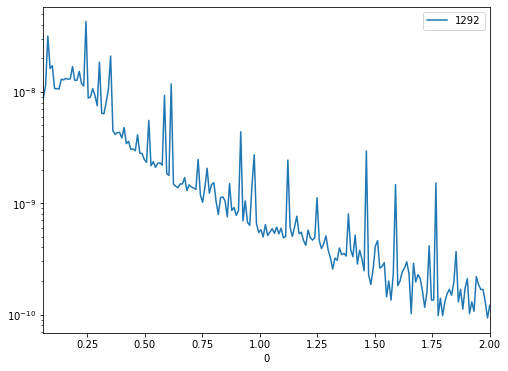

In [69]:
PNNLdata.plot(kind='line', y=1292, figsize=(8, 6), logy=True)

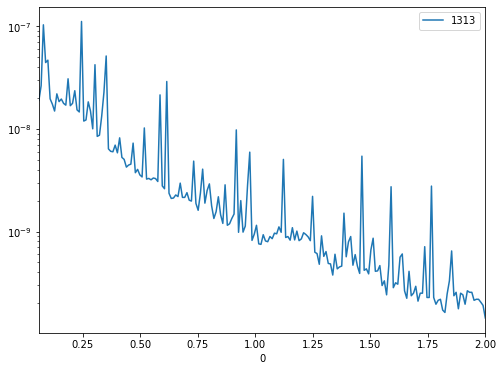

In [70]:
PNNLdata.plot(kind='line', y=1313, figsize=(8, 6), logy=True)

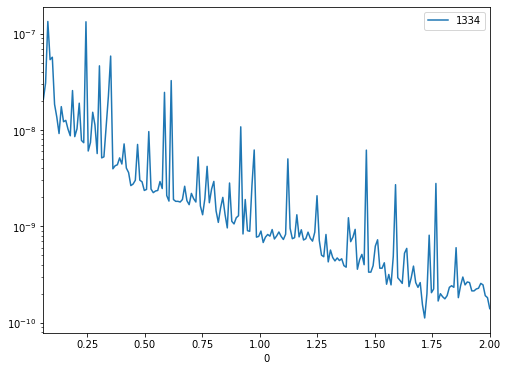

In [71]:
PNNLdata.plot(kind='line', y=1334, figsize=(8, 6), logy=True)

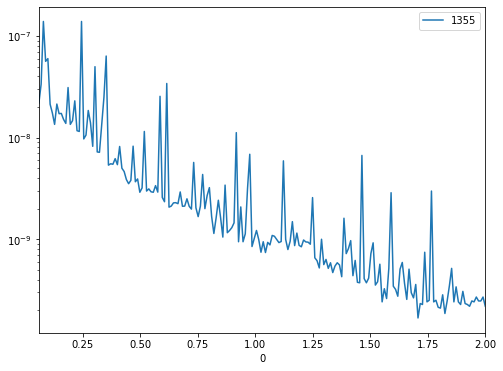

In [72]:
PNNLdata.plot(kind='line', y=1355, figsize=(8, 6), logy=True)

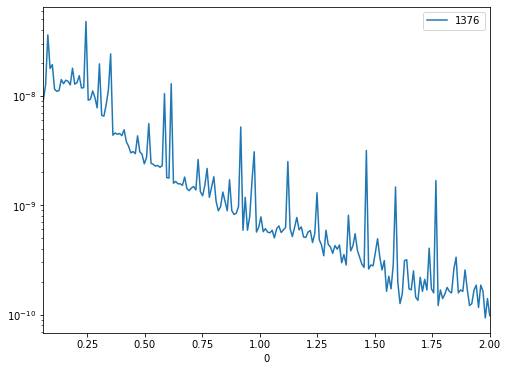

In [73]:
PNNLdata.plot(kind='line', y=1376, figsize=(8, 6), logy=True)

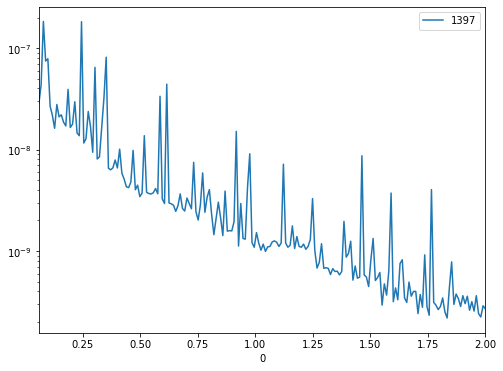

In [74]:
PNNLdata.plot(kind='line', y=1397, figsize=(8, 6), logy=True)

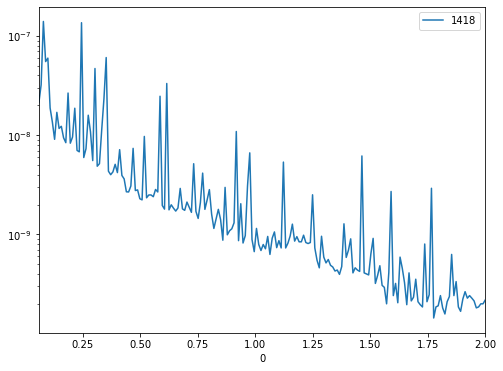

In [75]:
PNNLdata.plot(kind='line', y=1418, figsize=(8, 6), logy=True)

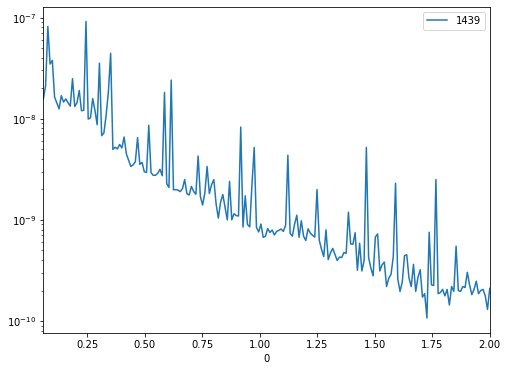

In [76]:
PNNLdata.plot(kind='line', y=1439, figsize=(8, 6), logy=True)

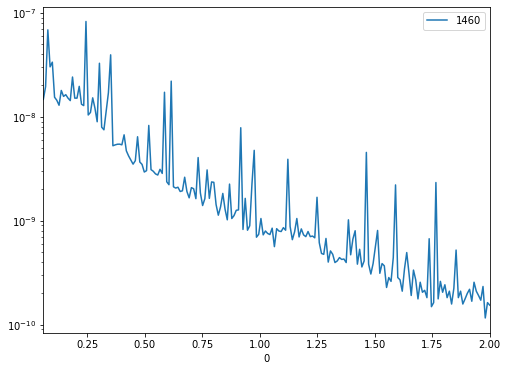

In [77]:
PNNLdata.plot(kind='line', y=1460, figsize=(8, 6), logy=True)

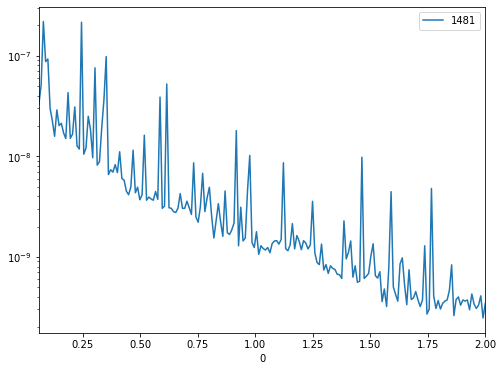

In [78]:
PNNLdata.plot(kind='line', y=1481, figsize=(8, 6), logy=True)

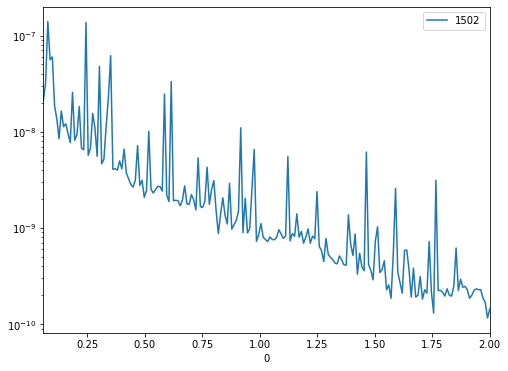

In [79]:
PNNLdata.plot(kind='line', y=1502, figsize=(8, 6), logy=True)

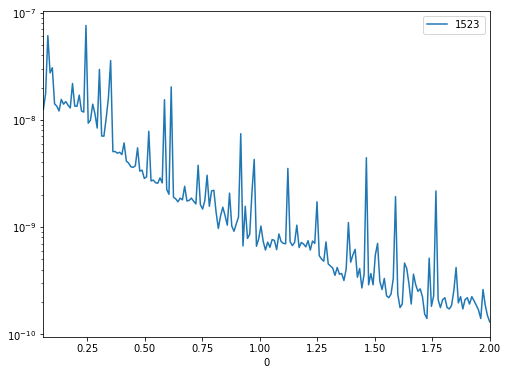

In [80]:
PNNLdata.plot(kind='line', y=1523, figsize=(8, 6), logy=True)

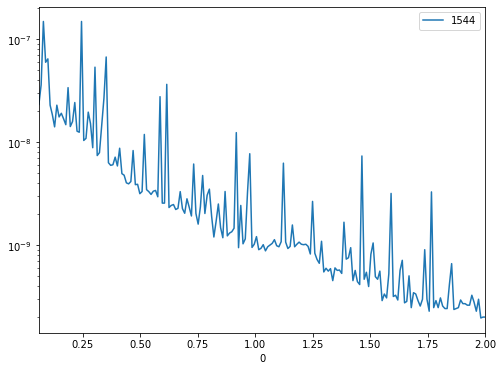

In [81]:
PNNLdata.plot(kind='line', y=1544, figsize=(8, 6), logy=True)

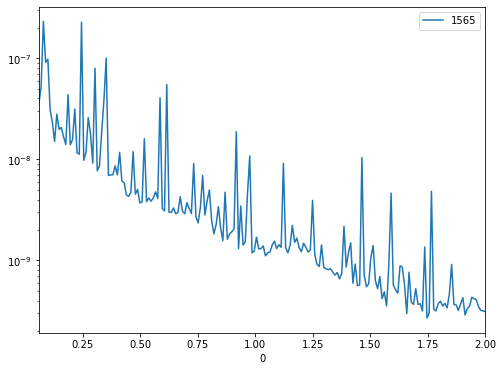

In [82]:
PNNLdata.plot(kind='line', y=1565, figsize=(8, 6), logy=True)

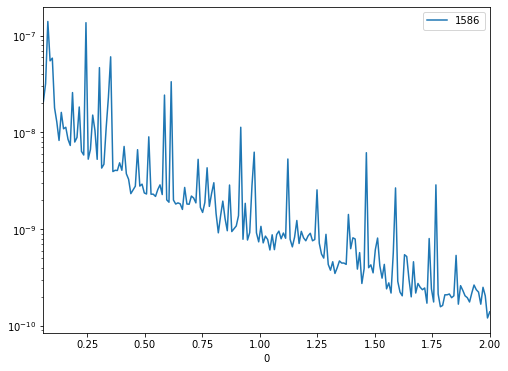

In [83]:
PNNLdata.plot(kind='line', y=1586, figsize=(8, 6), logy=True)

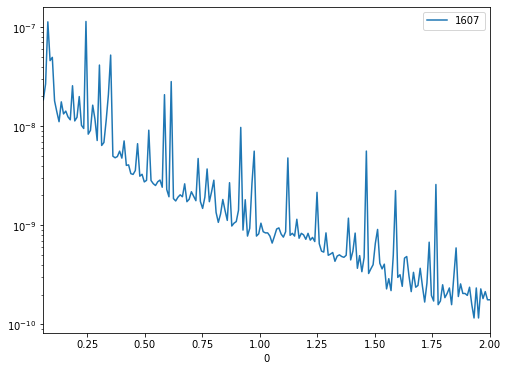

In [84]:
PNNLdata.plot(kind='line', y=1607, figsize=(8, 6), logy=True)

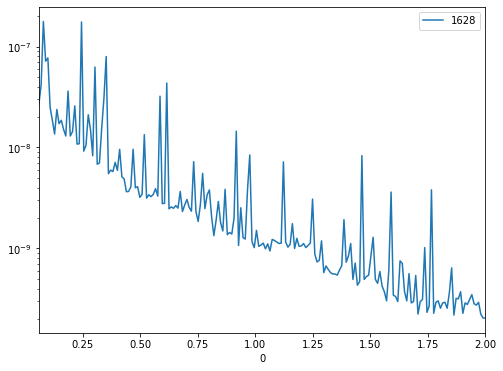

In [85]:
PNNLdata.plot(kind='line', y=1628, figsize=(8, 6), logy=True)

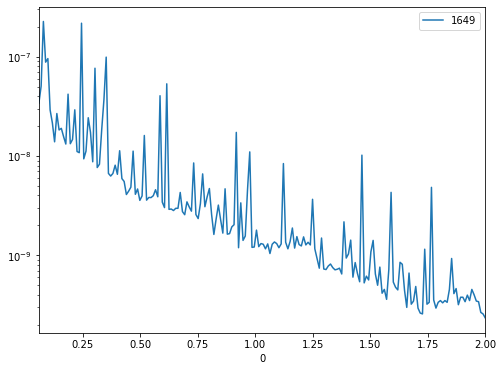

In [86]:
PNNLdata.plot(kind='line', y=1649, figsize=(8, 6), logy=True)

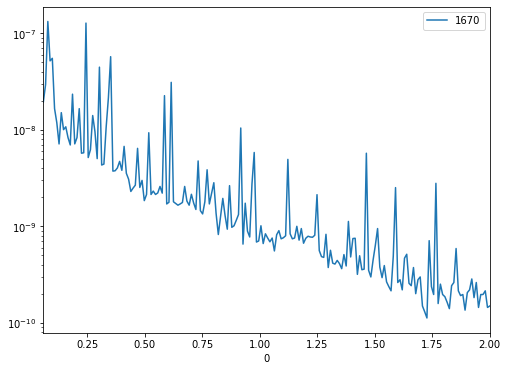

In [87]:
PNNLdata.plot(kind='line', y=1670, figsize=(8, 6), logy=True)

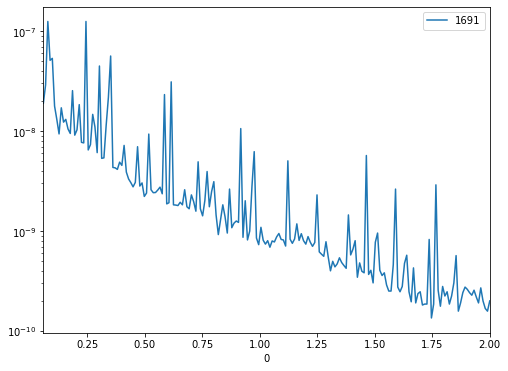

In [88]:
PNNLdata.plot(kind='line', y=1691, figsize=(8, 6), logy=True)

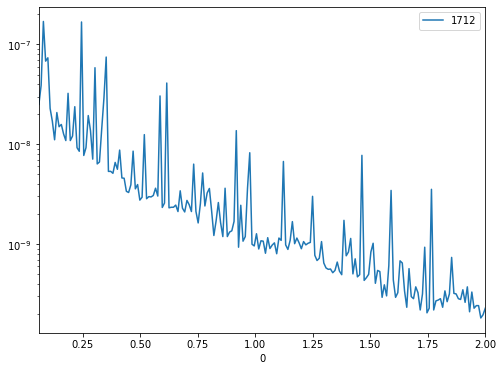

In [89]:
PNNLdata.plot(kind='line', y=1712, figsize=(8, 6), logy=True)

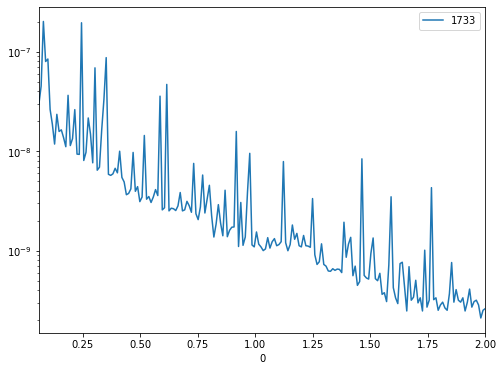

In [90]:
PNNLdata.plot(kind='line', y=1733, figsize=(8, 6), logy=True)

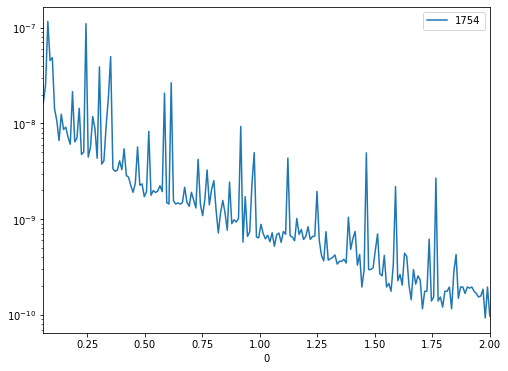

In [91]:
PNNLdata.plot(kind='line', y=1754, figsize=(8, 6), logy=True)
